# SI 370: Machine Learning Pipelines I

## Overview of Today
* Visualization of KMeans (using PCA)
* Introduction to machine learning pipeline

## Visualization of KMeans

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#music = pd.read_csv('data/music-fa2018.csv')
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSb23GQT6cvFueM0yWDZ6YAFjVlLKUb_7fdMHsmQb6x84iXC3bCWgzXjnxLr15gniYY-oOPjOn0dv0o/pub?gid=0&single=true&output=csv')

In [3]:
music = music.dropna() # Clustering doesn't like NaNs
music_indexed_by_name = music.set_index('Name')

In [4]:
kmeans = KMeans(n_clusters=3) # start with 3 clusters
kmeans.fit(music_indexed_by_name)
print("Labels:")
print(kmeans.labels_)


Labels:
[1 0 2 2 2 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 1 2 1 1 1 1 0 2 2 2 0 2 0 1 2 2 0
 1 1 2 0 1 1 0 1 1 1 1 2 1 0 0 0 2 2 0 2 0 2 0 0 0 0 1]


these are the cluster labels to which each individual has been assigned

In [5]:
data = music_indexed_by_name.copy()

In [6]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

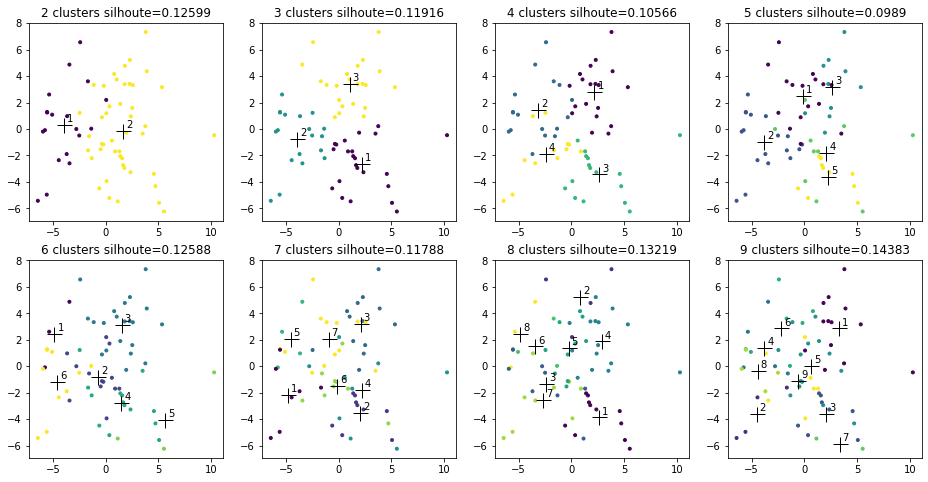

In [7]:
pca = PCA(n_components=2).fit(data)
data2d = pca.transform(data) # a numpy array with a list of each data point and its coords in that 2d space

fig = plt.figure(figsize=(16, 8)) # setting figure size of graphs

for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    pred = kmean.predict(data)
    ax = fig.add_subplot(2,4,i-1) # 2 rows, 4 cols, index of each thing in that space
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'k+', markersize=15) # 0 is x, 1 is y, k is for color(?)
    for i,(x,y) in enumerate(centroids2d):
        ax.annotate(i+1,xy=(x,y),xytext=(3,3),textcoords="offset points")


### <font color="magenta">Question 1: (10 minutes) Create a k-means visualization with k=3 for the malicious and benign web server data that you clustered for the most recent homework.  Interpret your results.

In [17]:
# INSERT YOUR CODE HERE

# read in data
comp = pd.read_csv('data/malicious_and_benign.csv')

# drop non-numerical values
comp = comp.replace('None', np.nan)
comp = comp.dropna()
comp = comp.drop(columns=['WHOIS_UPDATED_DATE', 'WHOIS_REGDATE', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'Type'])

# set index to url
comp_indexed_by_url = comp.set_index('URL')

# do a k-means with labeling
kmeans = KMeans(n_clusters=3)
kmeans.fit(comp_indexed_by_url)
print("Labels:")
print(kmeans.labels_)

Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [20]:
# we see there's an outlier, so we remove it?

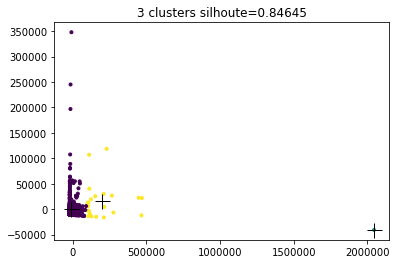

In [21]:
data = comp_indexed_by_url.copy()

pca = PCA(n_components=2).fit(data)
data2d = pca.transform(data)

kmean = KMeans(n_clusters = 3).fit(data)
pred = kmean.predict(data)
plt.title(f"{3} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
plt.scatter(data2d[:, 0], data2d[:, 1], c=pred, marker = '.')
    
centroids = kmean.cluster_centers_
centroids2d = pca.transform(centroids)
plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'k+', markersize=15)
for i,(x,y) in enumerate(centroids2d):
    ax.annotate(i+1,xy=(x,y),xytext=(3,3),textcoords="offset points")

I know there's an outlier, but I can't figure out how to take it out right now. I'd love to know how to do this, so I can see the graph without the skewing. Otherwise, it seems like there are two solid group (malicious and benign), which is good, and what I expected to see.

## Machine Learning Pipelines

### Why are these important?

### What are some common pipeline steps?

### Machine Learning Pipelines: why?

* integrates preprocessing and modeling steps
* makes code easier to read
* allow you to reuse pipeline on different data (e.g. training and testing, new data, etc.)
* make code reusable

### Preprocessing
* using a pipeline allows you to be sure you're applying the same steps to all data that you're using

### Common preprocessing steps

* imputation
* scaling
* one-hot encoding
* feature extraction (next class)

### Imputation
* fill in missing values using a specified method
* SimpleImputer(strategy="strategy") where strategy can be
    * mean
    * median
    * most_frequent
    * constant (replace missing values with value of "fill_value" argument)

In [22]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [23]:
imp_mean.statistics_

array([7. , 3.5, 6. ])

In [24]:
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]

In [25]:
np.array(X)

array([[nan,  2.,  3.],
       [ 4., nan,  6.],
       [10., nan,  9.]])

In [26]:
imp_mean.transform(X)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  3.5,  9. ]])

### Scaling
* most common method: remove the mean and scale to unit variance (i.e. convert to z-scores)
* StandardScaler()

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
scaler.transform(X)

array([[        nan, -1.        , -1.22474487],
       [-1.22474487,         nan,  0.        ],
       [ 1.22474487,         nan,  1.22474487]])

### <font color='magenta'> Question 2 (5 minutes) : how would you transform data using both simple imputation (using means) and scaling on [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]] without using Pipelines?</font>

In [30]:
# INSERT YOUR CODE HERE
ah = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]

import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
ah = imp_mean.fit_transform(ah)

import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ah = scaler.fit_transform(ah)

ah

array([[ 0.        , -1.22474487, -1.22474487],
       [-1.22474487,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

### One-hot Encoding
* you've done this using get_dummies()
* convert categorical variables to integer values

In [31]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df = pd.DataFrame([["blue","green","red"],["not blue","not green","not red"]],columns=['one','two','three'])
print(df)
ohe.fit(df)
print(ohe.get_feature_names())
print(ohe.transform(df).toarray())


        one        two    three
0      blue      green      red
1  not blue  not green  not red
['x0_blue' 'x0_not blue' 'x1_green' 'x1_not green' 'x2_not red' 'x2_red']
[[1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0.]]


Let's return to the malicious and benign web server data. First, let's load the data:

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv('data/malicious_and_benign.csv')

In [34]:
data.head(3)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0


In [35]:
data.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

Let's drop some columns that we're not interested in:

In [36]:
data = data.drop(['URL','WHOIS_REGDATE','WHOIS_UPDATED_DATE','WHOIS_STATEPRO'],axis=1)

Let's take a look at the data types that we have:

In [37]:
data.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Note that we have both categorical and numerical variables.


Create two dataframes: y, which has the "labels" and X, which contains the variables:

In [38]:
y = data['Type']
X = data.drop(['Type'],axis=1)

# labels are the y, everything else is the X (explanatory variables)

Let's split the data into training and testing datasets and then set up a couple of different preprocessing pipelines:

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [45]:
data.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [46]:
data.dtypes

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Use select_dtypes to select appropriate columns, then apply a ColumnTransformer that consists of two transformers: one for numerical and one for categorical variables:

In [47]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).drop('Type',axis=1).columns
categorical_features = data.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=10))])

In [49]:
rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [50]:
rf.score(X_test, y_test)

0.969187675070028

### <font color="magenta">Question 3 (10 minutes plus): Modify the above pipeline to use a Decision Tree Classifier instead of a Random Forest Classifier.  Compare and comment on the difference in accuracy for the two models.  How easy was it to change the classifier using the pipeline approach?</font>

In [57]:
# INSERT YOUR CODE HERE
import sklearn.tree as sktree
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', sktree.DecisionTreeClassifier())])

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9439775910364145

It appears a random forest is more accurate than a decision tree, which makes sense, as random forests are many decision trees. It wasn't that hard to change the classifier using the pipeline, which is super nice.

## END OF NOTEBOOK.  Remember to submit your completed notebook in HTML form.

### For Your Information only:

It's also possible to use cross-validation to evaluate your models in pipelines.  
The following code will take a while to
run so we recommend that you just look it over and run it on your own time.

Note that we can use the entire pipeline in the GridSearchCV.  Also note that the keys in the param_grid must
be prefixed by the name of the pipeline step where we use the param_grid concatenated with a double-underscore.

In [44]:
# Cross-validation:  note this will take a considerable time to complete
#                   We recommend that you just put this away for future reference
#                   The important point here is that the keys in the param_grid must be prefixed with
#                   the name of the classifier step in the original Pipeline

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4,5,6,7,8],
    'classifier__criterion' :['gini', 'entropy']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1, cv=5)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 500}
0.9466292134831461
